In [8]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

In [9]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

In [10]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        return np.mean((np.dot(X, w) - y) ** 2)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return (2 / y.shape[0]) * np.dot(X.T, np.dot(X, w) - y)

In [11]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    descents = [w_init]
    for i in range(n_iterations):
        w_init = w_init - lr * loss.calc_grad(X, y, w_init)
        descents.append(w_init)
        
    return descents

In [12]:
np.random.seed(1337)
loss = MSELoss()

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

In [13]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss, lr: float, batch_size: str = ''):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 7))
    if batch_size == '':
        plt.title(f"GD trajectory, lr = {lr}")
    else:
        plt.title(f"GD trajectory, lr = {lr}, batch_size = {batch_size}")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

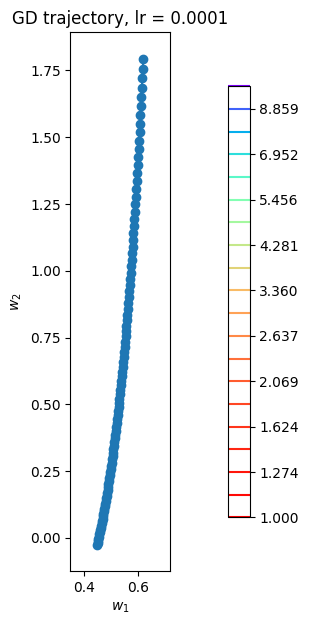

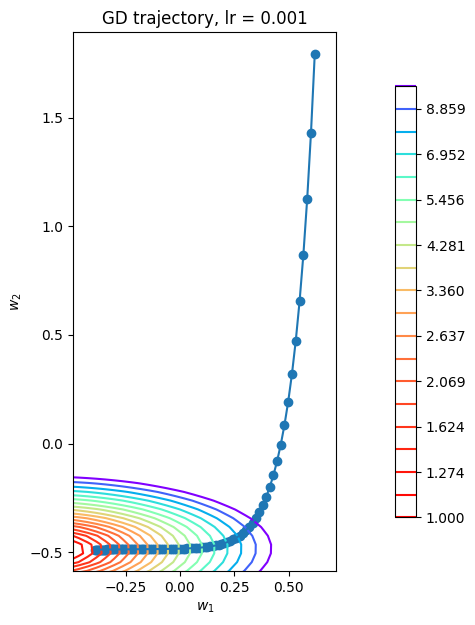

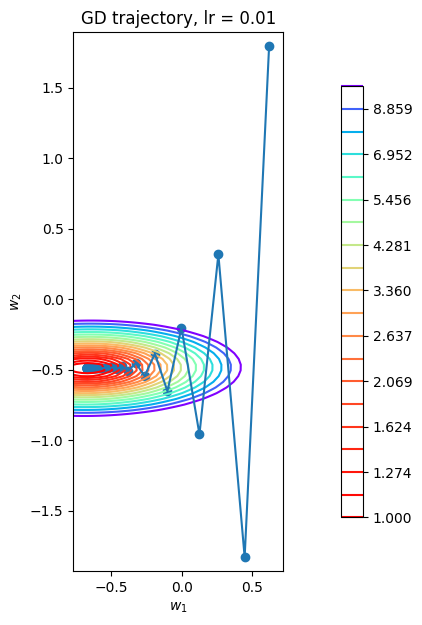

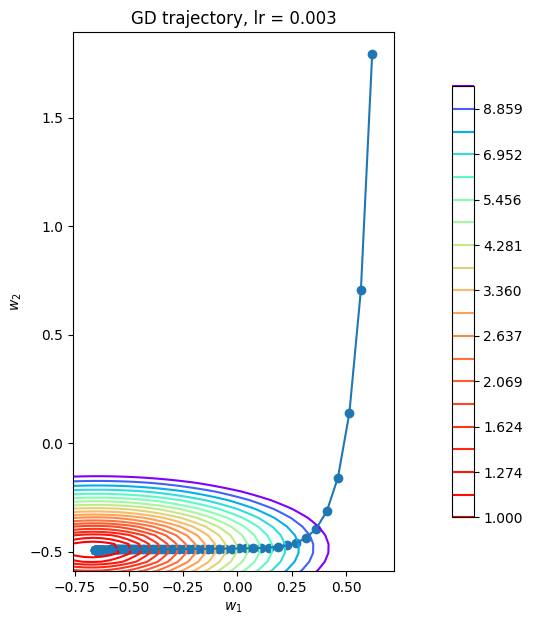

In [14]:
for lr in [0.0001, 0.001, 0.01, 0.003]:
    plot_gd(gradient_descent(w_init, X, y, loss=MSELoss(), lr=lr, n_iterations=100), X, y, loss, lr=lr)

# при lr = 0.0001 не дошёл до минимума за 100 шагов.
# при lr = 0.001 почти дошёл за 100 шагов.
# при lr = 0.01 хорошая траектория, достигнут минимум.
# lr = 0.1 слишком большой; при lr = 0.03 достигнут минимум за 100 шагов

In [15]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    descents = [w_init]
    for i in range(n_iterations):
        batch = np.random.choice(X.shape[0], size=batch_size, replace=False)
        w_init = w_init - lr * loss.calc_grad(X[batch], 
                                              y[batch], w_init)
        descents.append(w_init)
        
    return descents

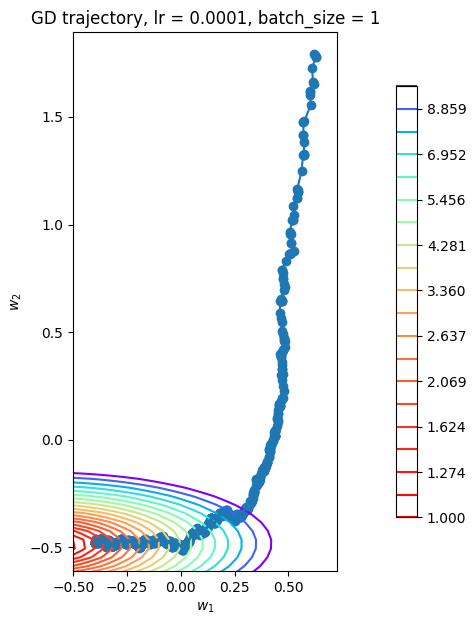

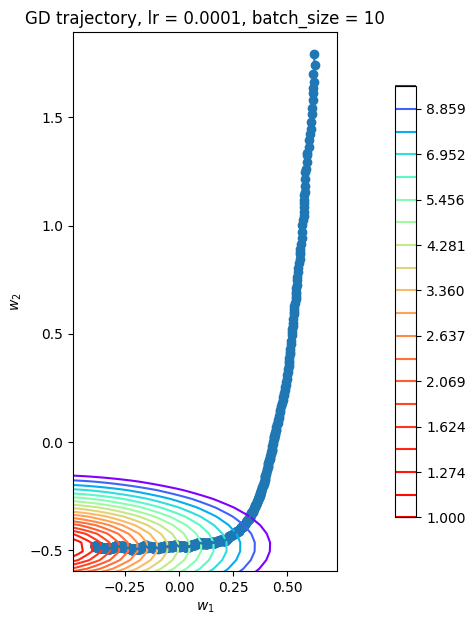

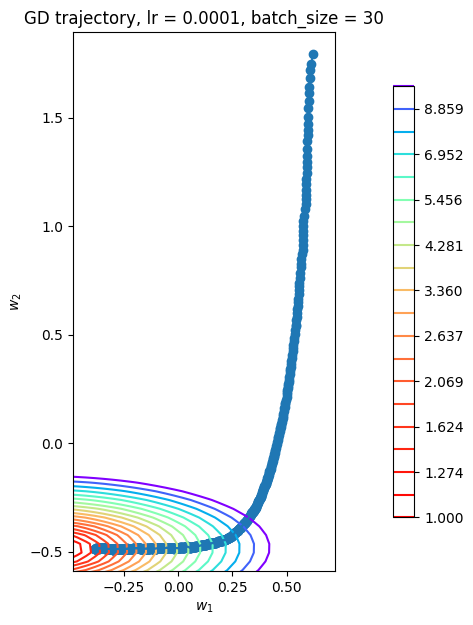

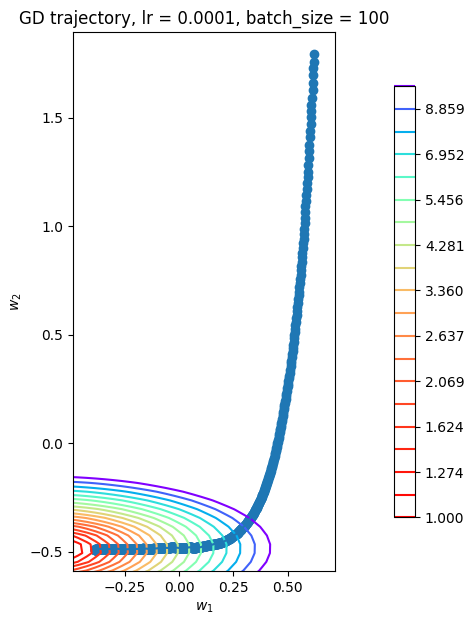

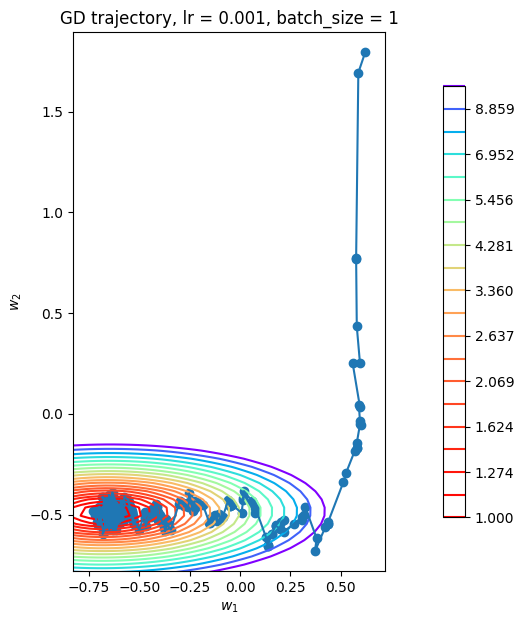

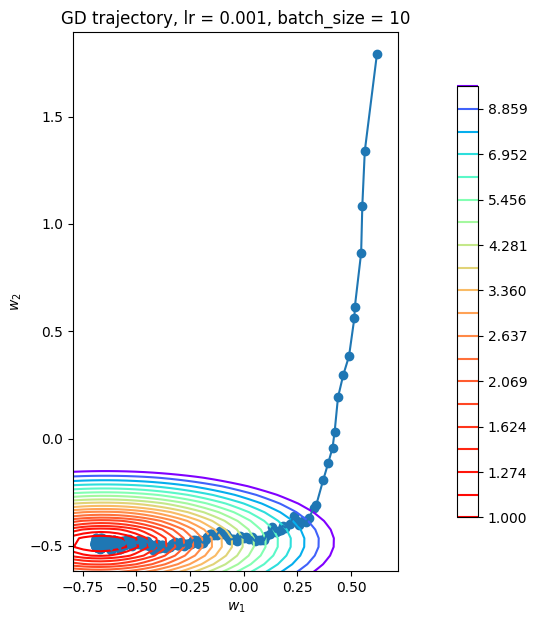

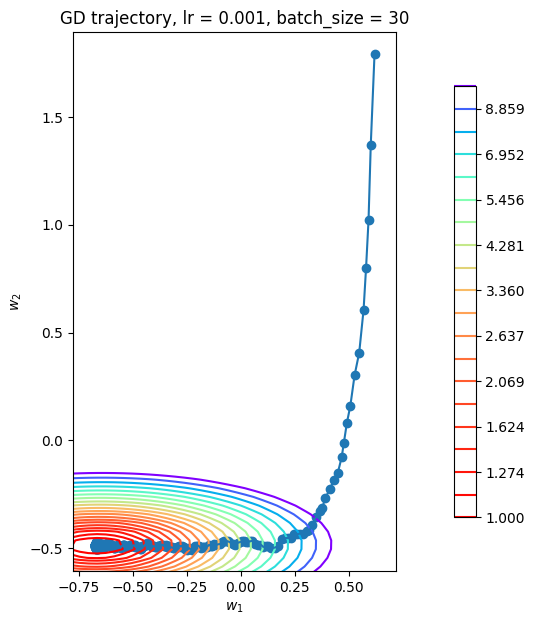

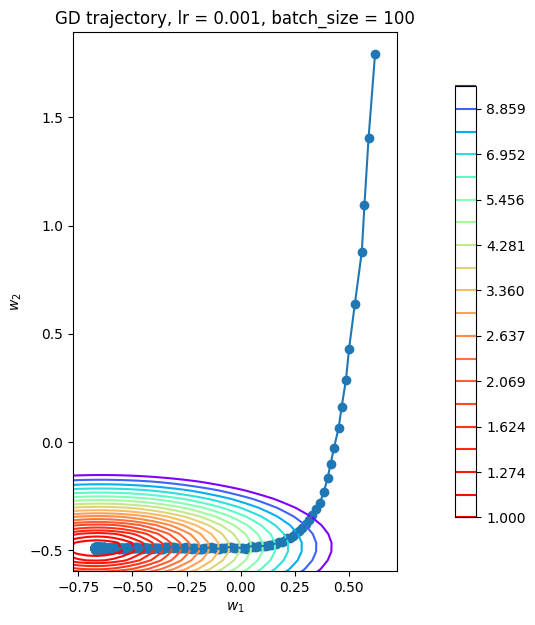

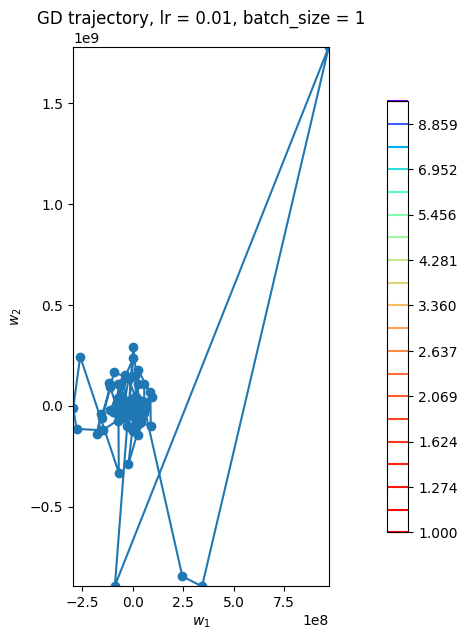

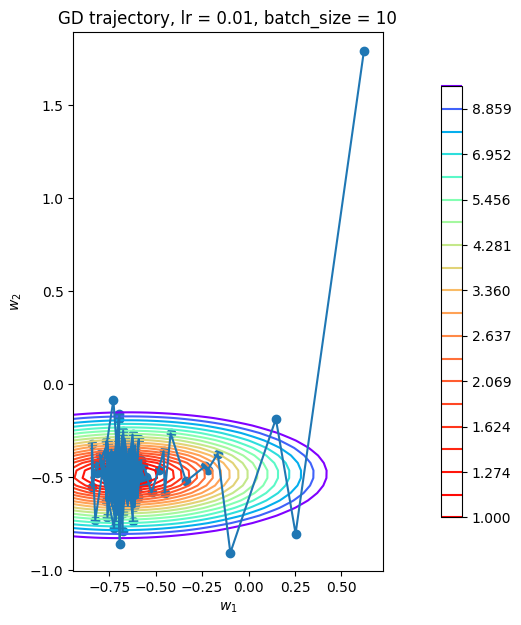

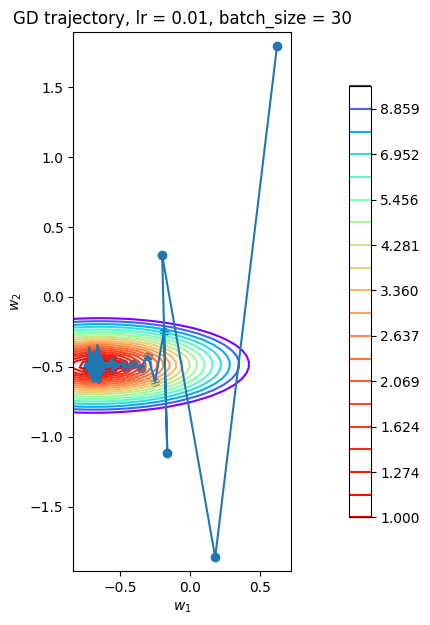

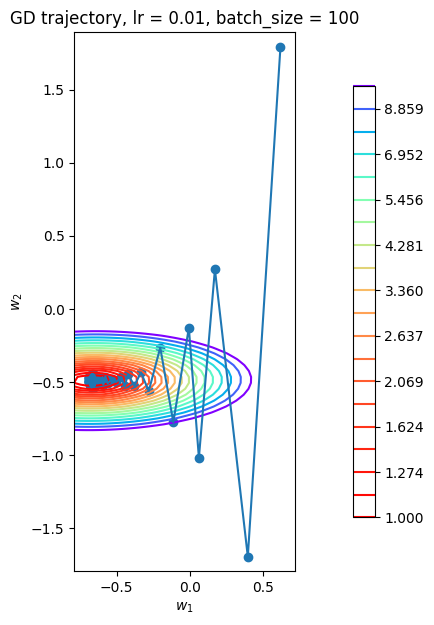

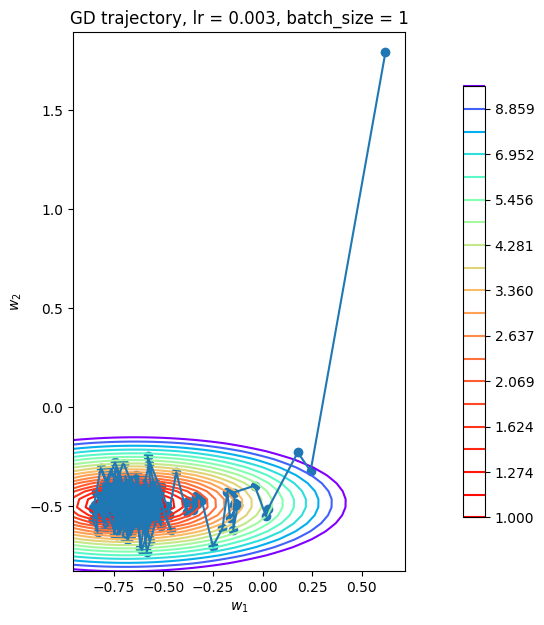

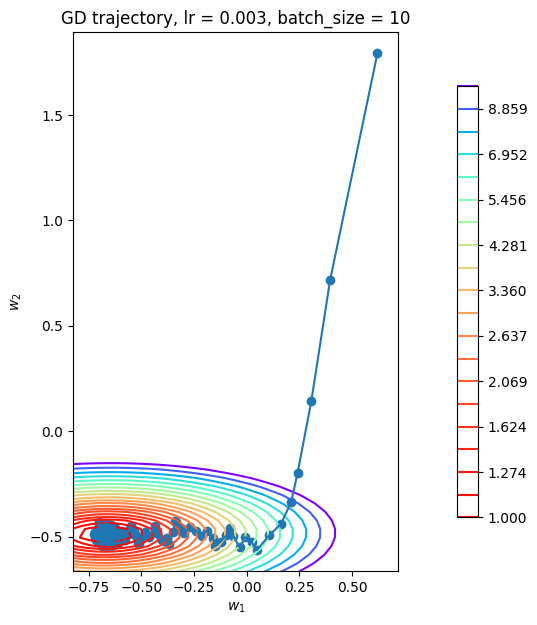

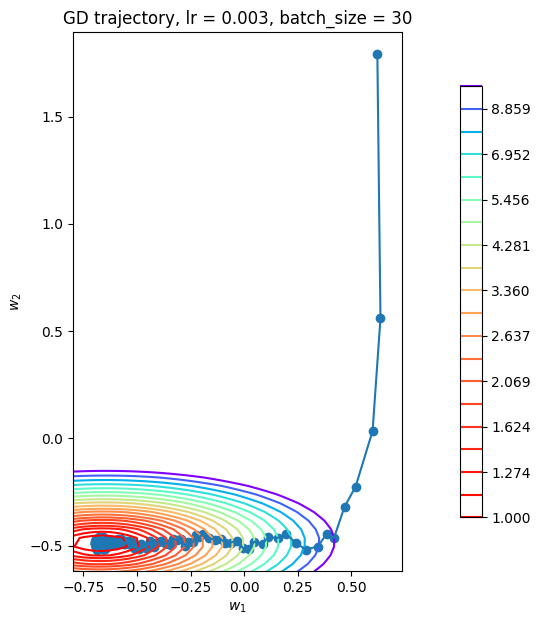

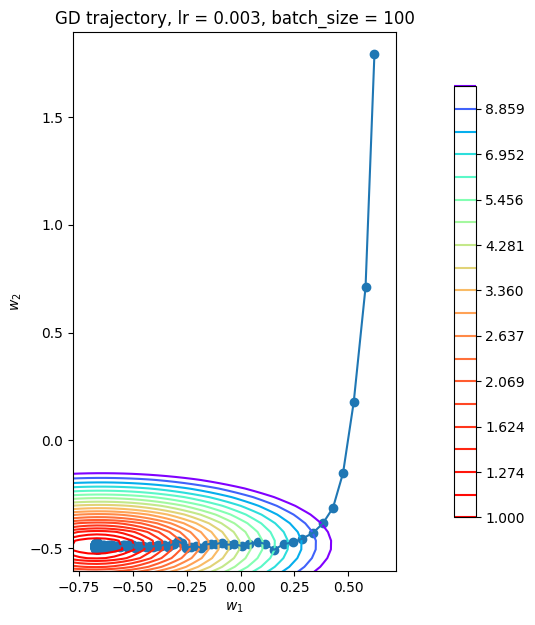

In [16]:
for lr in [0.0001, 0.001, 0.01, 0.003]:
    for batch_size in [1, 10, 30, 100]:
        plot_gd(stochastic_gradient_descent(w_init, X, y, loss=MSELoss(), lr=lr, batch_size=batch_size), 
                X, y, loss=MSELoss(), lr=lr, batch_size=batch_size)

In [17]:
def stochastic_gradient_descent_with_p(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    descents = [w_init]
    for i in range(n_iterations):
        batch = np.random.choice(X.shape[0], size=batch_size, replace=False)
        w_init = w_init - lr * ((100 / (100 + i)) ** p) * loss.calc_grad(X[batch], 
                                              y[batch], w_init)
        descents.append(w_init)       
        
    return descents

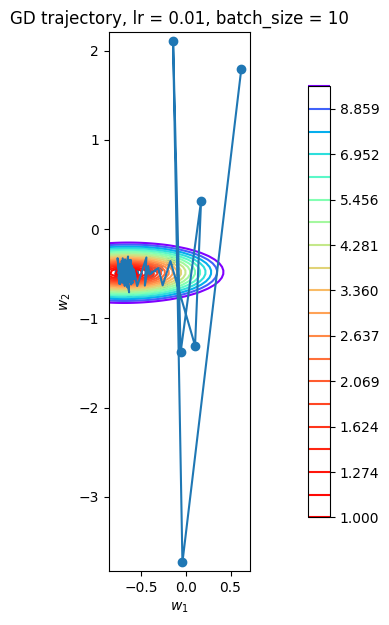

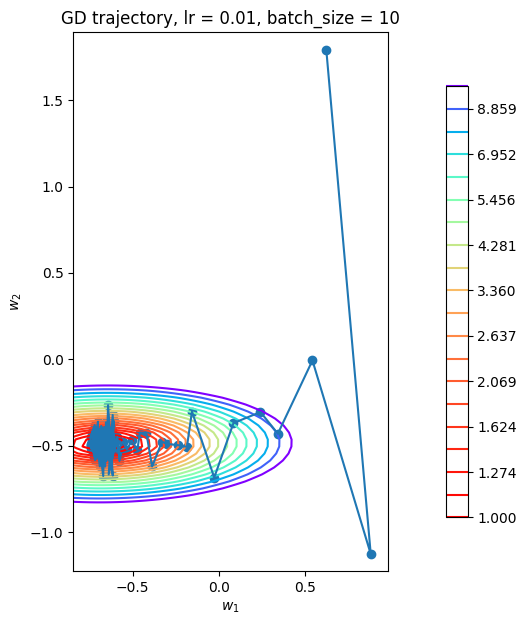

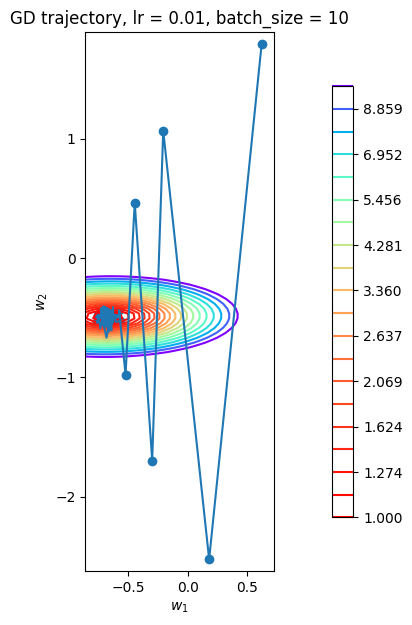

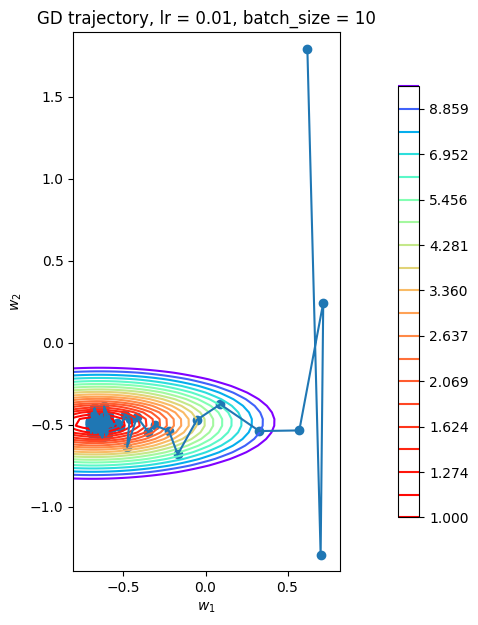

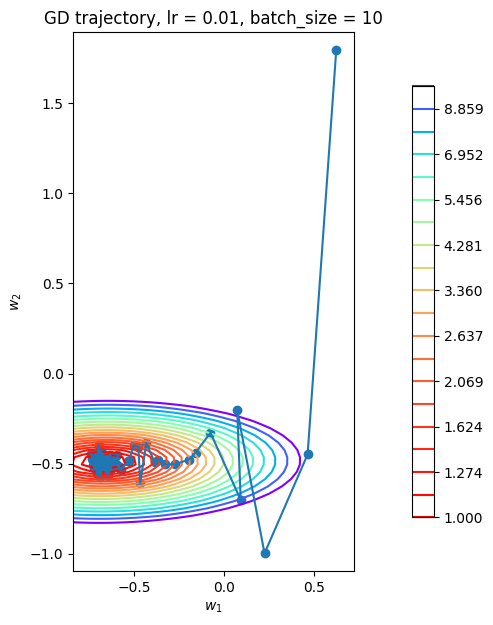

In [18]:
for p in [0.1, 0.25, 0.5, 0.75, 1]:
    plot_gd(stochastic_gradient_descent_with_p(w_init, X, y, loss, 0.01, 10, p), X, y, loss, lr=0.01, batch_size=10)

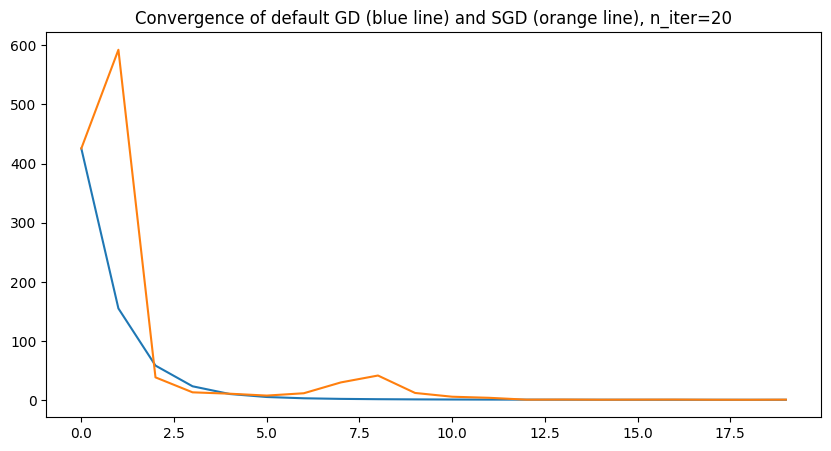

In [19]:
loss = MSELoss()
n_iter = 20

gd = gradient_descent(w_init, X, y, loss, 0.01, n_iterations=n_iter)
sgd = stochastic_gradient_descent_with_p(w_init, X, y, loss, 0.01, 10, p=1, n_iterations=n_iter)

_, ax = plt.subplots(figsize=(10, 5))
ax.plot(range(n_iter), [loss.calc_loss(X, y, gd[i]) for i in range(n_iter)])
ax.plot(range(n_iter), [loss.calc_loss(X, y, sgd[i]) for i in range(n_iter)])
plt.title(f'Convergence of default GD (blue line) and SGD (orange line), n_iter={n_iter}')
plt.show()

In [20]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.005) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        self.w = gradient_descent(np.random.uniform(size=X.shape[1]), X, y, self.loss, self.lr)[-1]

    def predict(self, X: np.ndarray) -> np.ndarray:
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        return np.dot(X, self.w)

In [21]:
linear_regression = LinearRegression(loss=MSELoss())

In [22]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
    index_col=0
)
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [23]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

In [24]:
from sklearn.impute import SimpleImputer

imputer_num = SimpleImputer()
num_col = X_raw.select_dtypes(include=[np.number])
X = pd.DataFrame(imputer_num.fit_transform(num_col))


imputer_cat = SimpleImputer(strategy='most_frequent')
cat_col = X_raw.select_dtypes(exclude=[np.number])
X = pd.concat([X, pd.DataFrame(imputer_cat.fit_transform(cat_col))], axis=1)

X = pd.get_dummies(X, drop_first=True, dtype=np.int64)
X.columns = X.columns.astype(str)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,8_three,8_twelve,8_two,9_2bbl,9_4bbl,9_idi,9_mfi,9_mpfi,9_spdi,9_spfi
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

bins = pd.cut(y, bins=8)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=bins, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
linear_regression.fit(X_train, y_train)

In [27]:
from sklearn.metrics import mean_squared_error

print('MSE on train:', mean_squared_error(linear_regression.predict(X_train), y_train))
print('MSE on test:', mean_squared_error(linear_regression.predict(X_test), y_test))

MSE on train: 1780102.3621047188
MSE on test: 9701634.833226984


In [28]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        w_no_bias = w[:-1]
        return np.mean((np.dot(X, w) - y) ** 2) + self.coef * np.dot(w_no_bias, w_no_bias)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        l2 = np.append(2 * self.coef * w[:-1], 0)  
        return 2 * np.dot(X.T, (np.dot(X, w) - y)) / X.shape[0] + l2

In [29]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

In [30]:
linear_regression.fit(X_train, y_train)

print('MSEL2Loss on train:', mean_squared_error(linear_regression.predict(X_train), y_train))
print('MSEL2Loss on test:', mean_squared_error(linear_regression.predict(X_test), y_test))

MSEL2Loss on train: 3139497.8518118653
MSEL2Loss on test: 3613219.7915975796


**Регрессия с регуляризацией показала результат почти в три раза лучше по среднеквадратичной ошибке на тестовой выборке, чем её коллега без регуляризации. На обучающей выборке ошибка увеличилась, однако важно то, что разница ошибок на обучающей и тестовой не так велика, как была.**

In [31]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        err = np.abs(np.dot(X, w) - y)
        res = np.where(err < self.eps, 
                       0.5 * (err ** 2), 
                       self.eps * (err - 0.5 * self.eps))
        return np.mean(res)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        err = np.dot(X, w) - y
        grad = np.where(np.abs(err) < self.eps, 
                        err, 
                        np.sign(err) * self.eps)[:, None]
        return np.mean(X * grad, axis=0)

In [32]:
linear_regression = LinearRegression(HuberLoss(400))

In [33]:
linear_regression.fit(X_train, y_train)

print('HuberLoss on train:', mean_squared_error(linear_regression.predict(X_train), y_train))
print('HuberLoss on test:', mean_squared_error(linear_regression.predict(X_test), y_test))

HuberLoss on train: 2595154.172630156
HuberLoss on test: 4206640.701210481


**Результат лучше, чем с MSELoss на тестовой выборке, но хуже на обучающей.**

In [34]:
def simulated_annealing(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    df: int = 3,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция имитации отжига
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    :param df: число степеней свободы для семплирования
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = [w_init]
    for i in range(1, n_iterations):
        t = np.log(i + 1)
        if t == 0:
            break
        new_w = w_init + np.random.standard_t(df, size=w_init.shape)
        loss_new = loss.calc_loss(X, y, new_w)
        loss_init = loss.calc_loss(X, y, w_init)
        if loss_new < loss_init or np.random.uniform() < np.exp(-(loss_new - loss_init) / t):
            w_init = new_w
        w.append(w_init)        
    return w

In [35]:
class LinearRegression_w_anneal:
    def __init__(self, loss: BaseLoss, df: int = 3) -> None:
        self.loss = loss
        self.df = df

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        self.w = simulated_annealing(np.random.uniform(size=X.shape[1]), X, y, self.loss, self.df)[-1]

    def predict(self, X: np.ndarray) -> np.ndarray:
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        return np.dot(X, self.w)

In [36]:
model = LinearRegression_w_anneal(MSELoss(), 3)
model.fit(X_train, y_train)

print('MSE on train:', mean_squared_error(model.predict(X_train), y_train))
print('MSE on test:', mean_squared_error(model.predict(X_test), y_test))

MSE on train: 1804043.2305712693
MSE on test: 7962231.101350163


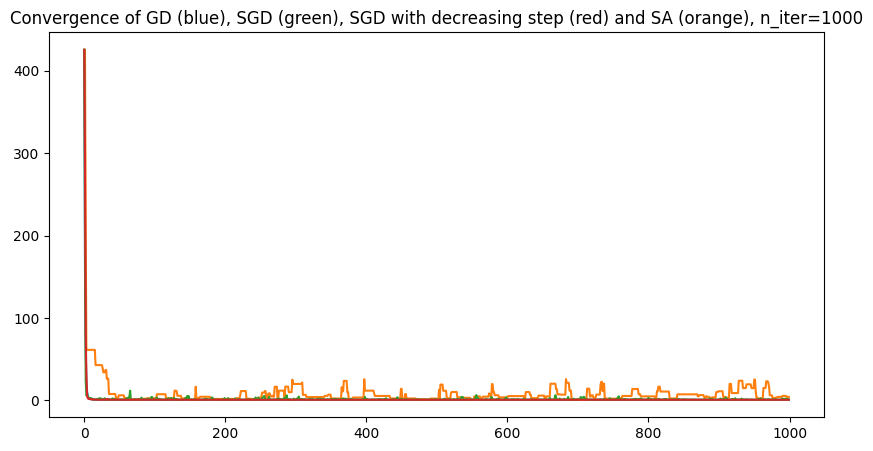

In [37]:
loss = MSELoss()
n_iter = 1000

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

gd = gradient_descent(w_init, X, y, loss, 0.01, n_iterations=n_iter)
sa = simulated_annealing(w_init, X, y, loss, df=120, n_iterations=n_iter)
sgd = stochastic_gradient_descent(w_init, X, y, loss, 0.01, batch_size, n_iterations=n_iter)
sgd_p = stochastic_gradient_descent_with_p(w_init, X, y, loss, 0.01, batch_size, 1,  n_iterations=n_iter)

_, ax = plt.subplots(figsize=(10, 5))
ax.plot(range(n_iter), [loss.calc_loss(X, y, gd[i]) for i in range(n_iter)])
ax.plot(range(n_iter), [loss.calc_loss(X, y, sa[i]) for i in range(n_iter)])
ax.plot(range(n_iter), [loss.calc_loss(X, y, sgd[i]) for i in range(n_iter)])
ax.plot(range(n_iter), [loss.calc_loss(X, y, sgd_p[i]) for i in range(n_iter)])
plt.title(f'Convergence of GD (blue), SGD (green), SGD with decreasing step (red) and SA (orange), n_iter={n_iter}')
plt.show()

**Модель с алгоритмом имитации отжига показывает результат лучше, чем регрессия без регуляризации, но на тестовой выборке проигрывает моделям с L2 и HuberLoss.**  
 
**Что касается сходимости функций: при сравнении с GD, SGD и SGD с убывающим шагом видно, что минимизации функции потерь происходит медленнее, однако на 30-40 итерациях мы находимся уже очень близко от нуля. На большем числе итераций видим, что SA периодически отпрыгивает от значений лосса, близких к нулю, однако со временем возвращается обратно.**